<a href="https://colab.research.google.com/github/OlegV12/Neural/blob/Lesson_3/Lesson_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Практическое задание

  1. Постройте нейронную сеть(берем простую линейную сеть, которую разбирали на уроке: меняем число слоев, число нейронов , типы активации, тип оптимизатора)  на датасет from sklearn.datasets import load_boston. 
  2. Измените функцию потерь и метрику для этой задачи. Постройте 10-15 вариантов и сведите результаты их работы в таблицу  Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

  3. Поработайте с документацией TensorFlow 2. Найти 2-3 полезные команды TensorFlow, не разобранные на уроке (полезные для Вас).

  1-2. (*)  Попробуйте обучить нейронную сеть на TensorFlow 2 на датасете imdb_reviews .Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?
    
    
</ol>



## Набор данных для последнего ДЗ

- COVID 19 диагностика https://www.kaggle.com/andrewmvd/covid19-ct-scans

- Распознавание изображений цифр в представлении языка жестов https://www.kaggle.com/ardamavi/sign-language-digits-dataset

In [1]:
from sklearn.datasets import load_boston
from tensorflow import keras
from tensorflow.keras import regularizers
# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Flatten
from tensorflow.keras.models import Model
import tensorflow as tf

In [2]:
# data = load_boston()

In [3]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  # plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

In [4]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [5]:
data.shape

(506, 13)

In [6]:
model = keras.Sequential([
    tf.keras.layers.Dense(500, input_dim=13, kernel_initializer='normal', activation='linear'),
    tf.keras.layers.Dense(500, kernel_initializer='normal', activation='linear'),
    tf.keras.layers.Dense(1, kernel_initializer='normal')
])

In [7]:
model.compile(loss='msle',
              optimizer=tf.keras.optimizers.Adam(0.00001))

In [8]:
# model.summary()

In [9]:
history = model.fit(
    data,
    target,
    validation_split=0.2,
    verbose=0, 
    batch_size=32,
    epochs=100)

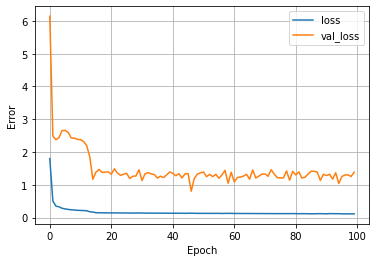

In [10]:
plot_loss(history)

In [11]:
loss_func = ['hinge', 'huber', 'mae', 'mse', 'msle']
performance = {}


In [12]:
for i in loss_func:
  model = keras.Sequential([
    tf.keras.layers.Normalization(input_shape=(13,), axis=None),
    tf.keras.layers.Dense(10000, kernel_initializer='normal', activation='relu'),
    tf.keras.layers.Dense(500, kernel_initializer='normal', activation='linear'),
    tf.keras.layers.Dense(1, kernel_initializer='normal')
  ])
  model.compile(loss=i,
                optimizer=tf.keras.optimizers.Adam(0.00001),
                metrics=['mae', 'mse', 'msle'])
  history = model.fit(
    data,
    target,
    validation_split=0.2,
    verbose=0, 
    batch_size=64,
    epochs=100)
  performance[i] = [history.history['val_loss'][-1],
                    history.history['mae'][-1],
                    history.history['mse'][-1],
                    history.history['msle'][-1]]
pd.DataFrame.from_dict(performance, orient='index',
                      columns=['val_loss', 'mae', 'mse', 'msle'])

,val_loss,mae,mse,msle
hinge,0.000000,206.920547,45781.562500,5.360318
huber,3.193397,4.125540,37.977753,0.070143
mae,3.997123,5.057868,45.775185,0.106114
mse,38.724609,4.547062,41.972206,0.067915
msle,0.161207,4.051739,39.228951,0.045573


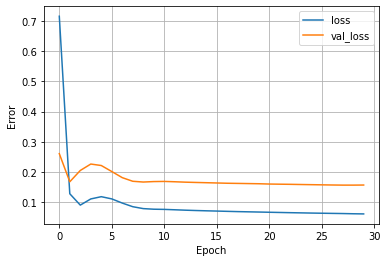

In [13]:
# после перебора нескольких параметров получил следующую модель

final_model = keras.Sequential([
    tf.keras.layers.Normalization(input_shape=(13,), axis=None),
    tf.keras.layers.Dense(10000, kernel_initializer='normal', activation='tanh'),
    tf.keras.layers.Dense(500, kernel_initializer='normal', activation='linear', ),
    tf.keras.layers.Dense(1, kernel_initializer='normal')
])

final_model.compile(loss='msle',
              optimizer=tf.keras.optimizers.Adam(0.00001),
              metrics=['mae', 'mse', 'msle']
              )
history = final_model.fit(
    data,
    target,
    validation_split=0.3,
    verbose=0, 
    batch_size=62,
    epochs=30)

plot_loss(history)

In [14]:
history.history['val_loss'][-1]

0.1572594940662384

Почитал в документации про слои предобработки Normalization, Rescaling,CategoryEncoding.